## 볼링핀 세우기

대학생이 된 철수는 생활비를 벌기 위해 볼링장에서 볼링핀을 갈아주는 알바를 하고 있습니다.  
볼링장이 워낙 오래되어서, 철수는 기계 없이 매번 손으로 볼링핀을 세워야 했습니다.  
알바가 지루해진 철수는 볼링핀을 자동으로 세워주는 기계를 만들려고 합니다.  
이 기계에 들어갈 볼링핀 설치 프로그램을 만들어 철수를 편안하게 해주고 싶습니다.   

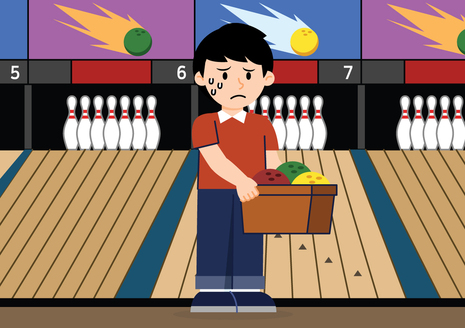

### 1. 볼링핀 설치 규칙

철희볼링장에서 볼링핀을 설치할때는 아래 그림과 같이 10개의 볼링핀을 설치하며 인접한 세 핀이 정삼각형을 이루도록 설치해야 합니다.  


그렇다면 가장 앞에있는 볼링핀의 위치는 어떻게 계산할까요?


### 2. 볼링핀의 위치 계산하기

검은색 테두리를 가지는 원들이 볼링핀이라고 가정해봅시다.  
빨간색으로 표시된 원이 가장 앞에 있는 볼링핀입니다. 이 볼링핀의 위치는 어떻게 계산해야할까요?

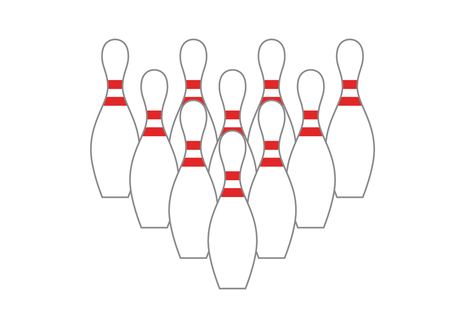

정답은 삼각함수를 사용하면 됩니다! 볼링핀 바로 위에서 왼쪽과 오른쪽에 있는 핀, 그리고 가장 앞에있는 핀은 정삼각형을 이루거든요.  
한 변의 길이를 $2x$라고 하고 왼쪽에 있는 핀의 좌표를 $(0,0)$으로 가정하면, 앞에 있는 핀의 좌표는 $(x, -\tan(60)x = -\sqrt{3}x))$가 되겠네요. 

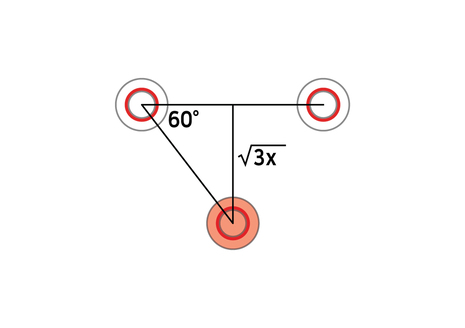

이러한 원리로 다른 핀들의 위치도 계산할 수 있겠죠? 그럼 철수를 도와 볼링핀 설치프로그램을 제작해봅시다.

#### 2.1. 볼링핀 출력하기

먼저 볼링핀 하나를 원하는 위치에 출력해볼께요. x와 y좌표를 받아 볼링핀 하나를 출력하는 함수 `make_pin`함수를 만들어주세요.
* 볼링핀을 원으로 가정하여 출력합니다. 볼링핀 하나의 반지름은 20입니다.
* 볼링핀 색깔은 여러분 마음대로:D

In [ ]:
world = World(width = 500, height = 500, axis=False)
def make_pin(x = 0, y = 0):
    Circle(x = x, y = y, radius = 20, color = 'black')
make_pin(30, 0)
make_pin(-30, 0)

#### 2.2. 인접한 볼링핀의 위치 계산하기

앞서 나왔던 인접한 볼링핀의 위치를 계산해봅시다. 인접한 볼링핀의 위치는  $(x, -\tan(60)x = -\sqrt{3}x))$였습니다. 
먼저 파이썬에서 탄젠트 값 혹은 루트 값을 어떻게 계산하는지 알아볼까요?  
파이썬에서 삼각함수 혹은 다른 연산을 수행하기 위해서는 `math`라는 라이브러리를 호출해와야 합니다.  
쓰는 방법은 다음과 같습니다.
* $tan(60)$: `math.tan`함수
    * 조심해야할 점이 있어요! math.tan 함수는 각도가 아닌 라디안 값을 인자로 받습니다. 그렇기 때문에 $\frac{\pi}{3}$을 인자로 넣어주어야 해요. $\pi$ 값은 math.pi를 통해 불러올 수 있어요
* $\sqrt{3}$: `math.sqrt`함수를 사용합니다. 

$\pi$값을 불러와봅시다.

In [ ]:
import math
math.pi

$\frac{\pi}{3}$을 `math.tan`함수에 넣어 $\tan{60}$을 계산해봅시다.

In [ ]:
import math
math.tan(math.pi / 3)

$\tan{60}$은 $\sqrt{3}$임이 알려져 있습니다. 한번 이 방법으로도 계산해볼까요?

In [ ]:
import math

math.sqrt(3)

계산한 $\tan{(60)} = \sqrt{3}$값으로 x와 y좌표를 계산하고, 우리가 아까 만든 `make_pin` 함수로 핀을 그려보아요. 핀 중심끼리의 간격은 60으로 가정해주세요.

In [ ]:
import math

world = World(width = 500, height = 500, axis=False)
make_pin(0, 0)
make_pin(30, - 30 * math.sqrt(3))  # 위에서 그린 핀과 인접한 핀을 그려줍니다. y좌표를  -30 * math.tan(math.pi / 3) 라고 해도 동일한 결과가 출력될 겁니다. 


#### 2.3. 인접하지 않은 볼링핀의 위치 계산하기

앞선 활동을 통해 인접한 볼링핀의 좌표를 구할 수 있었습니다. 그렇다면 가장 좌측 상단에 있는 볼링핀을 기준으로 다른 볼링핀의 위치를 계산할 수 있겠죠?   
위에서 i번째, 왼쪽에서 j번째인 핀의 좌표는 얼마일까요? 좌측 상단 점의 좌표를 $(0, 0)$으로, 핀 중심 간의 거리는 60으로 가정합니다.   
i와 j를 인수로 받아 거리를 출력하는 함수를 `get_coordinate`를 만들어 봅시다.  

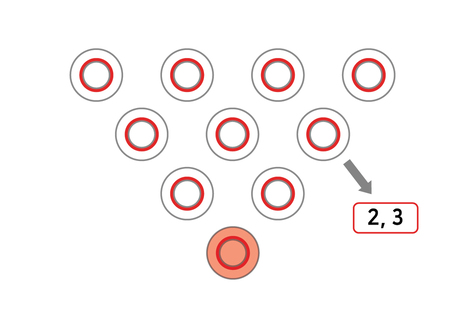

In [ ]:
import math

def get_coordinate(i, j):
    i -= 1  # 예를 들어, 위에서 3번째인 핀은 시작점에서 2칸만 이동하면 되죠? 이처럼 위치 정보를 이동 횟수와 맞춰주기 위해서 각 핀의 위치 정보에 -1을 해줍니다.   
    j -= 1

    # i, 1의 좌표 구하기 : 아래로만 i번 이동한 좌표입니다. 한번 아래로 내려갈 때마다 x는 60/2만큼 커지고, y는 tan60 만큼 작아집니다.
    x = 30.0 * i  
    y = -30.0 * math.sqrt(3) * i # 30 * math.tan(math.pi/3) * i도 가능합니다.
    # i, j의 좌표 구하기 : 위에서 구한 (x, y) 좌표에서 왼쪽으로만 j번 이동한 좌표입니다. 한번 왼쪽으로 이동할 때, x는 60만큼 커지고, y는 변하지 않습니다. 
    x += 60.0 * j 
    
    return [x, y]

get_coordinate(1, 2)

#### 2.4. 볼링핀 세우기

인접하지 않은 볼링핀끼리의 거리까지 구했으니, 볼링핀을 세울 차례입니다. 10개의 볼링핀이 모두 출력되도록 코드를 작성해주세요!

In [ ]:
world = World(width = 500, height = 500, axis=False)

# 핀의 좌표를 구할 때 필요한 매개변수는 i, j 두 개입니다. 따라서 두 개의 값을 모두 작성할 수 있도록 이중 for문을 돌려야 합니다.  
for i in range(1, 5): # i좌표를 1~4만큼 반복되도록 합니다. 즉 4개의 행이 만들어집니다. 
    for j in range(1, 6 - i): # 각 행의 핀 개수는 최대 4개에서 아래로 갈 수록 1개 씩 줄어듭니다. 따라서 i값(행)에 따라 핀의 개수가 달라질 수 있도록 조건을 설정합니다. 
        coordinates = get_coordinate(i, j)
        make_pin(coordinates[0], coordinates[1])

- 참고 : 이중 for문 결과  
i = 1 -> j = 1, 2, 3, 4     
i = 2 -> j = 1, 2, 3    
i = 3 -> j = 1, 2  
i = 4 -> j = 1  

### 3. 마무리

볼링공 기계를 만드는 데 성공했습니다. 그러나 철수는 이 기계를 만들었다는 것이 알려지면 자신이 잘릴 것을 눈치챘습니다. 기계가 있으면 자신이 할 일이 사라지기 때문입니다. 그날 밤, 철수는 기계를 들고 도망쳤고 훗날 근처에 새로운 볼링장이 생겼다고 전해진 답니다...ㅎ  

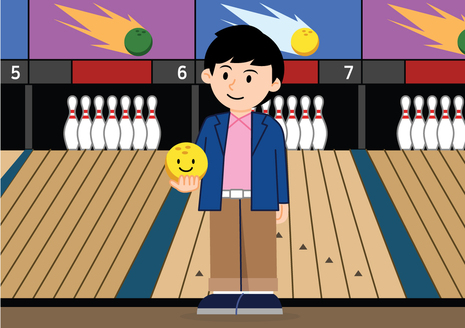

#### 3.1. 에필로그

철수가 운영하는 볼링장에서 옆 볼링장과의 차별점을 두기 위해 볼링핀의 개수를 아래 그림과 같이 15개로 늘리고자 합니다.  
철수가 만든 기계는 10개의 볼링핀을 기준으로 하고 있었기 때문에 수정이 필요합니다. 철수를 도와 프로그램을 수정해봅시다.  



In [ ]:
world = World(width = 700, height = 700, axis=False)

# 한 행의 최대 핀 개수와 한 열의 최대 핀 개수는 모두 5개 입니다. 
for i in range(1, 6):
    for j in range(1, 7 - i):
        coordinates = get_coordinate(i, j)
        make_pin(coordinates[0], coordinates[1])